<a href="https://colab.research.google.com/github/yashgupta417/imdb/blob/master/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [0]:
vocab_size=5000
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=vocab_size)

In [3]:
#data is already preprocessed
X_train[1][:10]#first 10 words of review 1

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463]

In [4]:
#we need padding to perform batch SGD
max_review_length=600
X_train=sequence.pad_sequences(X_train,maxlen=max_review_length)
X_test=sequence.pad_sequences(X_test,maxlen=max_review_length)
X_train.shape

(25000, 600)

In [9]:
embedded_vector_length=32
model=Sequential()
#Embedding layer can be used as Layer 1 only,it is like word2vec but model is learning it as part of task
model.add(Embedding(vocab_size,embedded_vector_length,input_length=max_review_length))#params=4*(nm+n^2+n) m:inputs n:outputs
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 32)           160000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 600, 100)          53200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 293,701
Trainable params: 293,701
Non-trainable params: 0
_________________________________________________________________


In [11]:
history=model.fit(X_train,y_train,batch_size=2048,epochs=20,validation_data=(X_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 43s 2ms/step - loss: 0.6888 - accuracy: 0.5400 - val_loss: 0.6302 - val_accuracy: 0.6438
Epoch 2/20
25000/25000 [==============================] - 45s 2ms/step - loss: 0.5719 - accuracy: 0.7119 - val_loss: 0.5288 - val_accuracy: 0.7376
Epoch 3/20
25000/25000 [==============================] - 46s 2ms/step - loss: 0.6456 - accuracy: 0.7627 - val_loss: 0.4896 - val_accuracy: 0.7920
Epoch 4/20
25000/25000 [==============================] - 44s 2ms/step - loss: 0.4546 - accuracy: 0.7959 - val_loss: 0.4118 - val_accuracy: 0.8209
Epoch 5/20
25000/25000 [==============================] - 44s 2ms/step - loss: 0.3682 - accuracy: 0.8433 - val_loss: 0.3883 - val_accuracy: 0.8325
Epoch 6/20
25000/25000 [==============================] - 45s 2ms/step - loss: 0.3254 - accuracy: 0.8682 - val_loss: 0.3794 - val_accuracy: 0.8362
Epoch 7/20
25000/25000 [==============================] - 45s 2ms/st

In [12]:
scores=model.evaluate(X_test,y_test,verbose=0,batch_size=4096)
print("accuracy",scores[1]*100)

accuracy 84.89599823951721


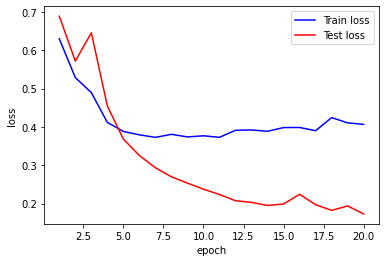

In [14]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

x=list(range(1,20+1))

vy=history.history['val_loss']
ty=history.history['loss']

def plt_dynamic(x,y,y_1,ax,colors=['b']):
    ax.plot(x,y,'b',label='Train loss')
    ax.plot(x,y_1,'r',label='Test loss')
    plt.legend()
    fig.canvas.draw()
plt_dynamic(x,vy,ty,ax)